In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame
import folium
from folium.plugins import MarkerCluster
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,  r2_score,  accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeRegressor


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv(r'C:\Users\tanmi\Downloads\NYPDD.csv')
display(df.tail(20))

C:\Users\tanmi\AppData\Local\Temp\ipykernel_37056\272328561.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\tanmi\Downloads\NYPDD.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1967084,02/05/2023,18:56,QUEENS,11373.0,40.733906,-73.871780,"(40.733906, -73.87178)",NaN,NaN,90-01 QUEENS BOULEVARD,...,Driver Inattention/Distraction,NaN,NaN,NaN,4603432,Sedan,Sedan,NaN,NaN,NaN
1967085,02/01/2023,17:00,NaN,NaN,40.687180,-73.799140,"(40.68718, -73.79914)",INWOOD STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4603789,Sedan,NaN,NaN,NaN,NaN
1967086,02/05/2023,11:25,BRONX,10469.0,40.861115,-73.854910,"(40.861115, -73.85491)",YATES AVENUE,WARING AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4603528,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1967087,02/02/2023,20:50,NaN,NaN,40.847310,-73.914900,"(40.84731, -73.9149)",WEST 174 STREET,GRAND AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4603654,Sedan,Sedan,NaN,NaN,NaN
1967088,02/05/2023,7:15,NaN,NaN,40.660150,-73.853330,"(40.66015, -73.85333)",BELT PARKWAY,NaN,NaN,...,Obstruction/Debris,Unspecified,Unspecified,Unspecified,4603318,Pick-up Truck,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,Sedan
1967089,02/05/2023,0:30,MANHATTAN,10003.0,40.731964,-73.988160,"(40.731964, -73.98816)",EAST 12 STREET,3 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4603227,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1967090,01/31/2023,0:00,MANHATTAN,10040.0,40.857980,-73.930910,"(40.85798, -73.93091)",WEST 193 STREET,BROADWAY TERRACE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4603716,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
1967091,02/04/2023,20:20,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4603797,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
1967092,02/05/2023,1:29,QUEENS,11101.0,40.742874,-73.933945,"(40.742874, -73.933945)",VANDAM STREET,47 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4603383,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1967093,02/05/2023,19:39,BRONX,10469.0,40.871544,-73.848370,"(40.871544, -73.84837)",NaN,NaN,1306 EAST GUN HILL ROAD,...,Other Vehicular,Unspecified,NaN,NaN,4603364,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN


In [3]:
df.columns


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [4]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           611358
ZIP CODE                          611594
LATITUDE                          225710
LONGITUDE                         225710
LOCATION                          225710
ON STREET NAME                    410477
CROSS STREET NAME                 728791
OFF STREET NAME                  1648998
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6058
CONTRIBUTING FACTOR VEHICLE 2     296584
CONTRIBUTING FACTOR VEHICLE 3    1828789
CONTRIBUTING FACTOR VEHICLE 4    1936274
CONTRIBUTING FACTOR VEHICLE 5    1958826
COLLISION_ID                           0
VEHICLE TYPE COD

In [5]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'BOROUGH', 'ZIP_CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'NUMBER_OF_PERSONS_INJURED',
       'NUMBER_OF_PERSONS_KILLED', 'NUMBER_OF_PEDESTRIANS_INJURED',
       'NUMBER_OF_PEDESTRIANS_KILLED', 'NUMBER_OF_CYCLIST_INJURED',
       'NUMBER_OF_CYCLIST_KILLED', 'NUMBER_OF_MOTORIST_INJURED',
       'NUMBER_OF_MOTORIST_KILLED', 'CONTRIBUTING_FACTOR_VEHICLE_1',
       'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3',
       'CONTRIBUTING_FACTOR_VEHICLE_4', 'CONTRIBUTING_FACTOR_VEHICLE_5',
       'COLLISION_ID', 'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2',
       'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5'],
      dtype='object')

In [6]:
oldest_date = df['CRASH_DATE'].min()
newest_date = df['CRASH_DATE'].max()
print("Date", oldest_date , "To ", newest_date)

Date 01/01/2013 To  12/31/2022


In [7]:
missing_data = df.isnull().sum()
missing_data

CRASH_DATE                             0
CRASH_TIME                             0
BOROUGH                           611358
ZIP_CODE                          611594
LATITUDE                          225710
LONGITUDE                         225710
LOCATION                          225710
ON_STREET_NAME                    410477
CROSS_STREET_NAME                 728791
OFF_STREET_NAME                  1648998
NUMBER_OF_PERSONS_INJURED             18
NUMBER_OF_PERSONS_KILLED              31
NUMBER_OF_PEDESTRIANS_INJURED          0
NUMBER_OF_PEDESTRIANS_KILLED           0
NUMBER_OF_CYCLIST_INJURED              0
NUMBER_OF_CYCLIST_KILLED               0
NUMBER_OF_MOTORIST_INJURED             0
NUMBER_OF_MOTORIST_KILLED              0
CONTRIBUTING_FACTOR_VEHICLE_1       6058
CONTRIBUTING_FACTOR_VEHICLE_2     296584
CONTRIBUTING_FACTOR_VEHICLE_3    1828789
CONTRIBUTING_FACTOR_VEHICLE_4    1936274
CONTRIBUTING_FACTOR_VEHICLE_5    1958826
COLLISION_ID                           0
VEHICLE_TYPE_COD

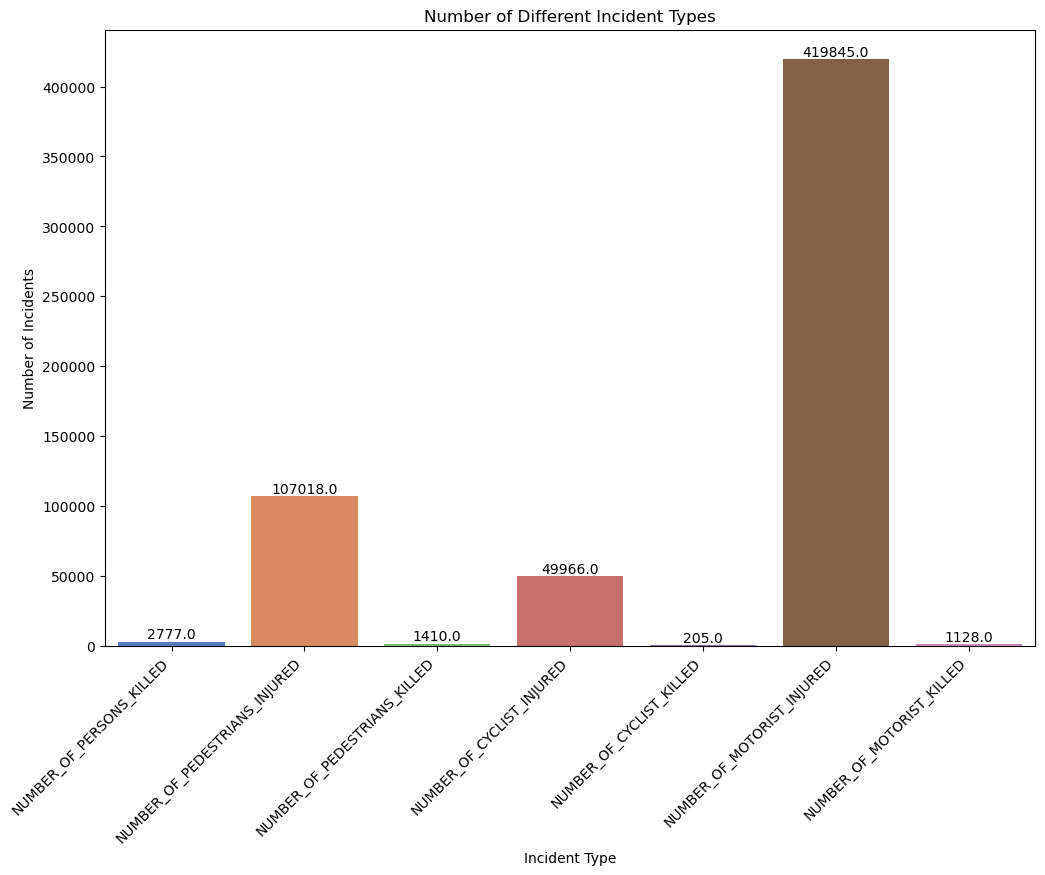

In [8]:
incident_columns = [
    'NUMBER_OF_PERSONS_KILLED',
    'NUMBER_OF_PEDESTRIANS_INJURED',
    'NUMBER_OF_PEDESTRIANS_KILLED',
    'NUMBER_OF_CYCLIST_INJURED',
    'NUMBER_OF_CYCLIST_KILLED',
    'NUMBER_OF_MOTORIST_INJURED',
    'NUMBER_OF_MOTORIST_KILLED',
]

incident_counts = df[incident_columns].sum()

plt.figure(figsize=(12, 8))
plt.title("Number of Different Incident Types")
sns.barplot(x=incident_counts.index, y=incident_counts.values, palette="muted")
plt.xlabel("Incident Type")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha="right")

# Count
for i, count in enumerate(incident_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

## Identify top locations in NYC with the highest number of accidents

In [9]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

top_locations = df[['LATITUDE', 'LONGITUDE']].groupby(['LATITUDE', 'LONGITUDE']).size().reset_index(name='accident_count').sort_values(by='accident_count', ascending=False).head(10)

map_center = [40.7128, -74.0060]  # NYC Map Center
top_accident_map = folium.Map(location=map_center, zoom_start=10)

marker_cluster = MarkerCluster().add_to(top_accident_map)

for index, row in top_locations.iterrows():
    latitude = row['LATITUDE']
    longitude = row['LONGITUDE']
    
    if pd.notna(latitude) and pd.notna(longitude):
        popup_html = f"<b>Accident Count:</b> {row['accident_count']}"
        
        folium.Marker(
            location=[latitude, longitude],
            popup=folium.Popup(popup_html, max_width=300),
            icon=None,
        ).add_to(marker_cluster)

# Display the map
display(top_accident_map)


In [10]:
df['Accident_Severity'] = (df['NUMBER_OF_PERSONS_INJURED'] > 0) | (df['NUMBER_OF_PERSONS_KILLED'] > 0)
df['Accident_Severity'] = df['Accident_Severity'].astype(int)

df = df.drop(['NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED'], axis=1)

print(df['Accident_Severity'].value_counts())
print(df.head())

Accident_Severity
0    1536229
1     430875
Name: count, dtype: int64
   CRASH_DATE CRASH_TIME   BOROUGH ZIP_CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN  11208.0  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN  11233.0  40.683304 -73.917274   

                  LOCATION           ON_STREET_NAME CROSS_STREET_NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF_STREET_NAME  ...  CONTRIBUTING_FACTOR_VEHICLE_3  \
0         

In [11]:
# Define features and target variable    ###need code from other contributors to run this successfully. 
features = ['LATITUDE', 'LONGITUDE', 'day_of_week', 'Hour_of_Day']
target = 'Accident_Severity'

data = df[features + [target]].dropna()

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['day_of_week'], drop_first=True)

# Train test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define X and y for training
X_train = train_data.drop(target, axis=1)
y_train = train_data[target]

# Define X and y for testing
X_test = test_data.drop(target, axis=1)
y_test = test_data[target]

# LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model Evalution
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

KeyError: "['day_of_week', 'Hour_of_Day'] not in index"